<a href="https://colab.research.google.com/github/abhi354-beep/Javacodes/blob/main/AOA_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deliverable 1 : Code Implementation and verification of correctness for Knapsack topdown and bottomup approach**

In [ ]:
import java.util.*;

public class KnapsackBottomUpAndTopDown {

    public static void main(String[] args) {

       /* int [] values = {42,12,40,25};
        int [] weights ={7,3,4,5};
        */

        int W = 8;
        int n = 100;
       // long executionTimeTopDown = 0;
        //long executionTimebottomUp = 0;
       // for(int i =0; i<5; i++) {
            int[] values = randomValuesArray(n, W);
            System.out.println("Values :" + Arrays.toString(values));
            int[] weights = randomWeightsArray(n, n);
            System.out.println("Weights :" + Arrays.toString(weights));


            int[][] bottomUptable = new int[weights.length + 1][W + 1];

            //bottomUp Method calling
            long bottomUpStartTime = System.nanoTime();
            ArrayList<Integer> bottomUpRes = bottomUpApproach(bottomUptable, values, weights, W, weights.length);

            System.out.println("indexexes of weights used in bottomUp approach :" + bottomUpRes);
            long bottomUpEndTime = System.nanoTime();
            System.out.println("bottomUp approach :" + (bottomUpEndTime - bottomUpStartTime) / 1_000 + " microsecs");
           // executionTimebottomUp +=(bottomUpEndTime - bottomUpStartTime) ;


            // Top Down Approach calling
            long topDownStartTime = System.nanoTime();
            List<Integer> selectedItems = topDownApproach(weights, values, weights.length - 1, W);
            long topDownEndTime = System.nanoTime();
            System.out.println("indexees of weights used in topDown approach :" + selectedItems);
            System.out.println("TopDown approach :" + (topDownEndTime - topDownStartTime) / 1_000 + " microsecs");
           // executionTimeTopDown +=(topDownEndTime - topDownStartTime) ;

      //  }
       // System.out.println("Average executionTimeTopDown approach :" + executionTimeTopDown/1_000   + " microsecs");
        //System.out.println("Average executionTimebottomUp approach :" + executionTimebottomUp/1_000 + " microsecs");


    }
    public static int[] randomValuesArray(int length, int n) {
        int[] array = new int[length];
        Random random = new Random();
        for (int i = 0; i <= length-1; i++) {
            array[i] = random.nextInt(n);
        }
        return array;
    }

    public static int[] randomWeightsArray(int length, int n) {
        int[] array = new int[length];
        Random random = new Random();
        for (int i = 0; i <= length-1; i++) {
            array[i] = random.nextInt(n);
        }
        return array;
    }
    public static List<Integer> topDownApproach(int[] weights, int[] values, int index, int W){
        int[][] topDownMemo = new int[weights.length+1][W+1];

        for (int[] row : topDownMemo) {
            Arrays.fill(row, -1);

        }
        int optimalRes =topDownApproach(weights, values, weights.length-1,W,topDownMemo);

        System.out.println("optimal weight using topdown: "+ optimalRes );

        return topDownBackTrack( W, topDownMemo, weights);

    }

    public static ArrayList<Integer> bottomUpApproach(int [][] table,int [] values, int[] weights, int W, int n){
        for(int i =1; i<=n; i++){
            for(int j =1; j<=W;j++){
                int weight =weights[i-1];
                if(weight>j){
                    table[i][j]=table[i-1][j];

                }else{
                    table[i][j] = Math.max(table[i-1][j],values[i-1]+table[i-1][j-weight]);
                }
            }
        }
        System.out.println("optimal weight using topdown:"+ table[n][W] );
        ArrayList<Integer> res= new ArrayList<>();
        int i= n;
        int j =W;
        while(i>0 && j>0){
            if(table[i][j]!=table[i-1][j]){
                res.add(i-1);
                j= j-weights[i-1];
            }
            i--;
        }
        return res;
    }

    public static int topDownApproach(int[] weights, int[] values, int index, int W, int[][] topDownMemo) {

        if (index == 0) {
            if (weights[0] <= W) {
                return values[0];
            } else {
                return 0;
            }
        }
        if (topDownMemo[index][W] != -1) {
            return topDownMemo[index][W];
        }

        int notConsider = topDownApproach(weights, values, index - 1, W, topDownMemo);

        int consider = Integer.MIN_VALUE;
        if (weights[index] <= W) {
            consider = values[index] + topDownApproach(weights, values, index - 1, W - weights[index], topDownMemo);
        }

        topDownMemo[index][W] = Math.max(notConsider, consider);
        return topDownMemo[index][W];
    }

    public static List<Integer> topDownBackTrack(int W, int[][] topDownMemo, int[]weights){
        List<Integer> selectedItems = new ArrayList<>();
        int j = W;
        for (int i = weights.length - 1; i > 0; i--) {
            if (topDownMemo[i][j] != topDownMemo[i - 1][j] && topDownMemo[i][j] != 0) {
                selectedItems.add(i);
                j -= weights[i];
            }
        }
        if (j >= weights[0]) {
            selectedItems.add(0);
        }

        return selectedItems;

    }


}


 **Verification of Correctness results:**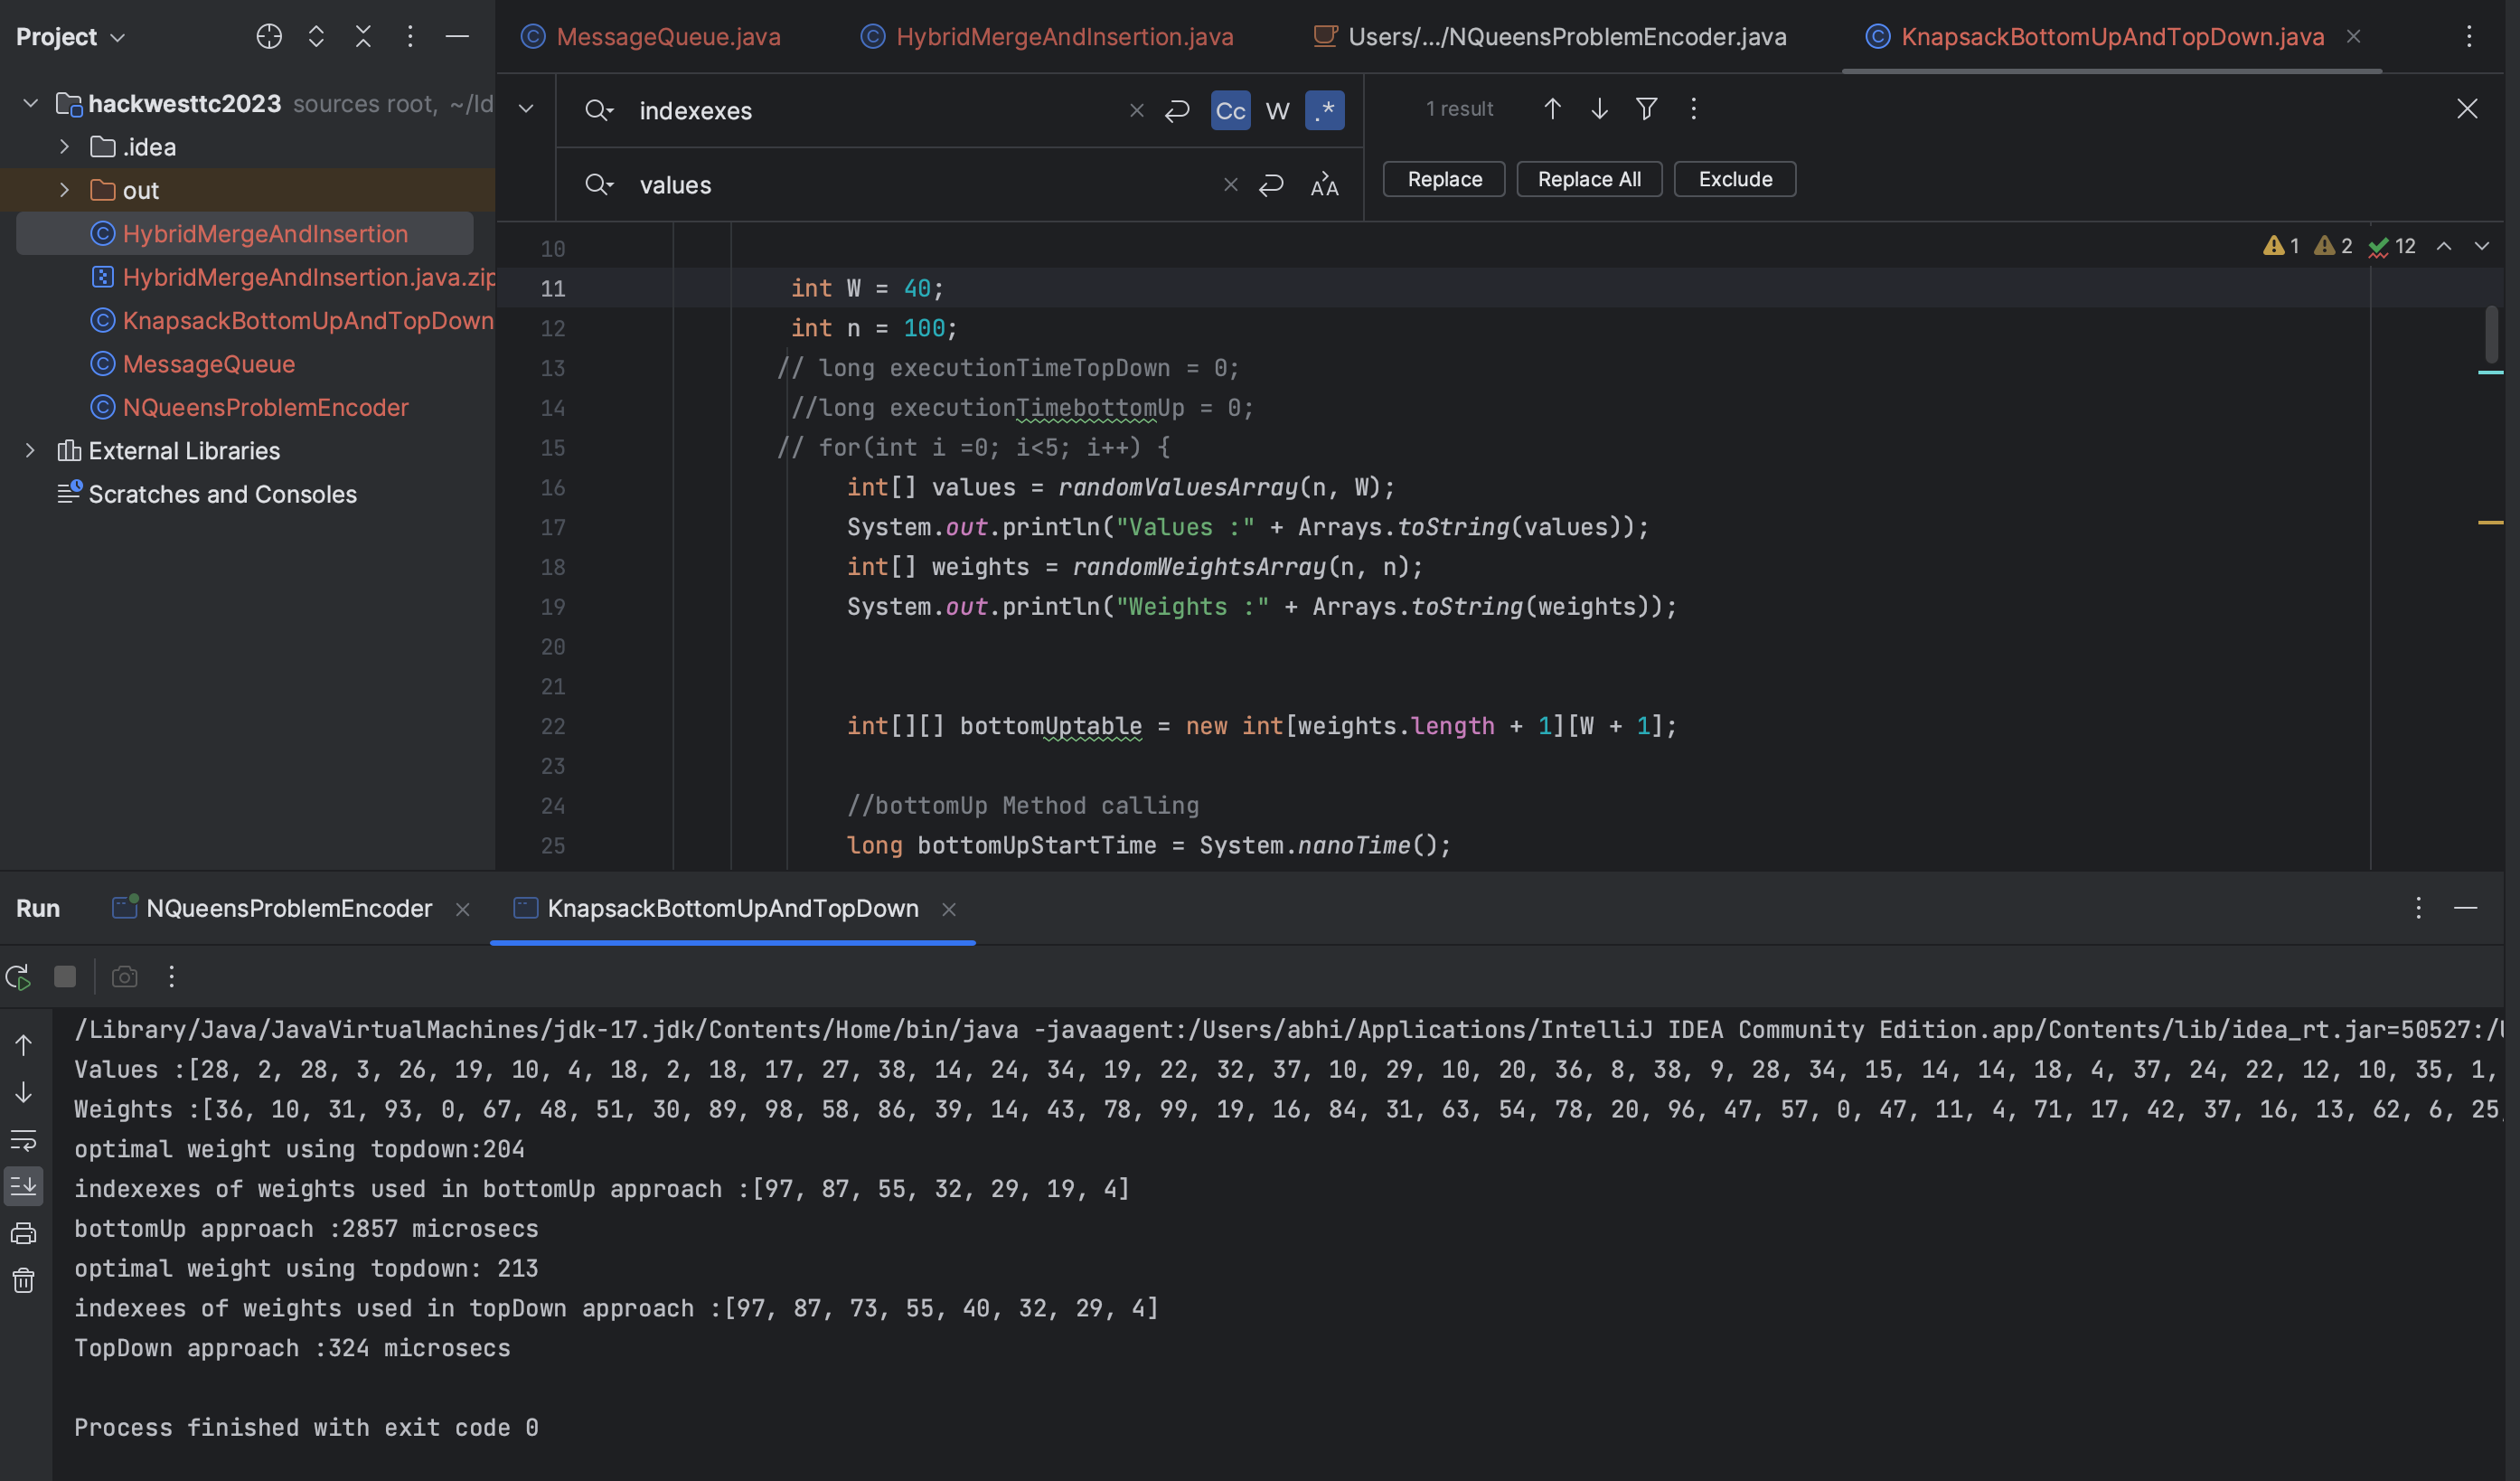





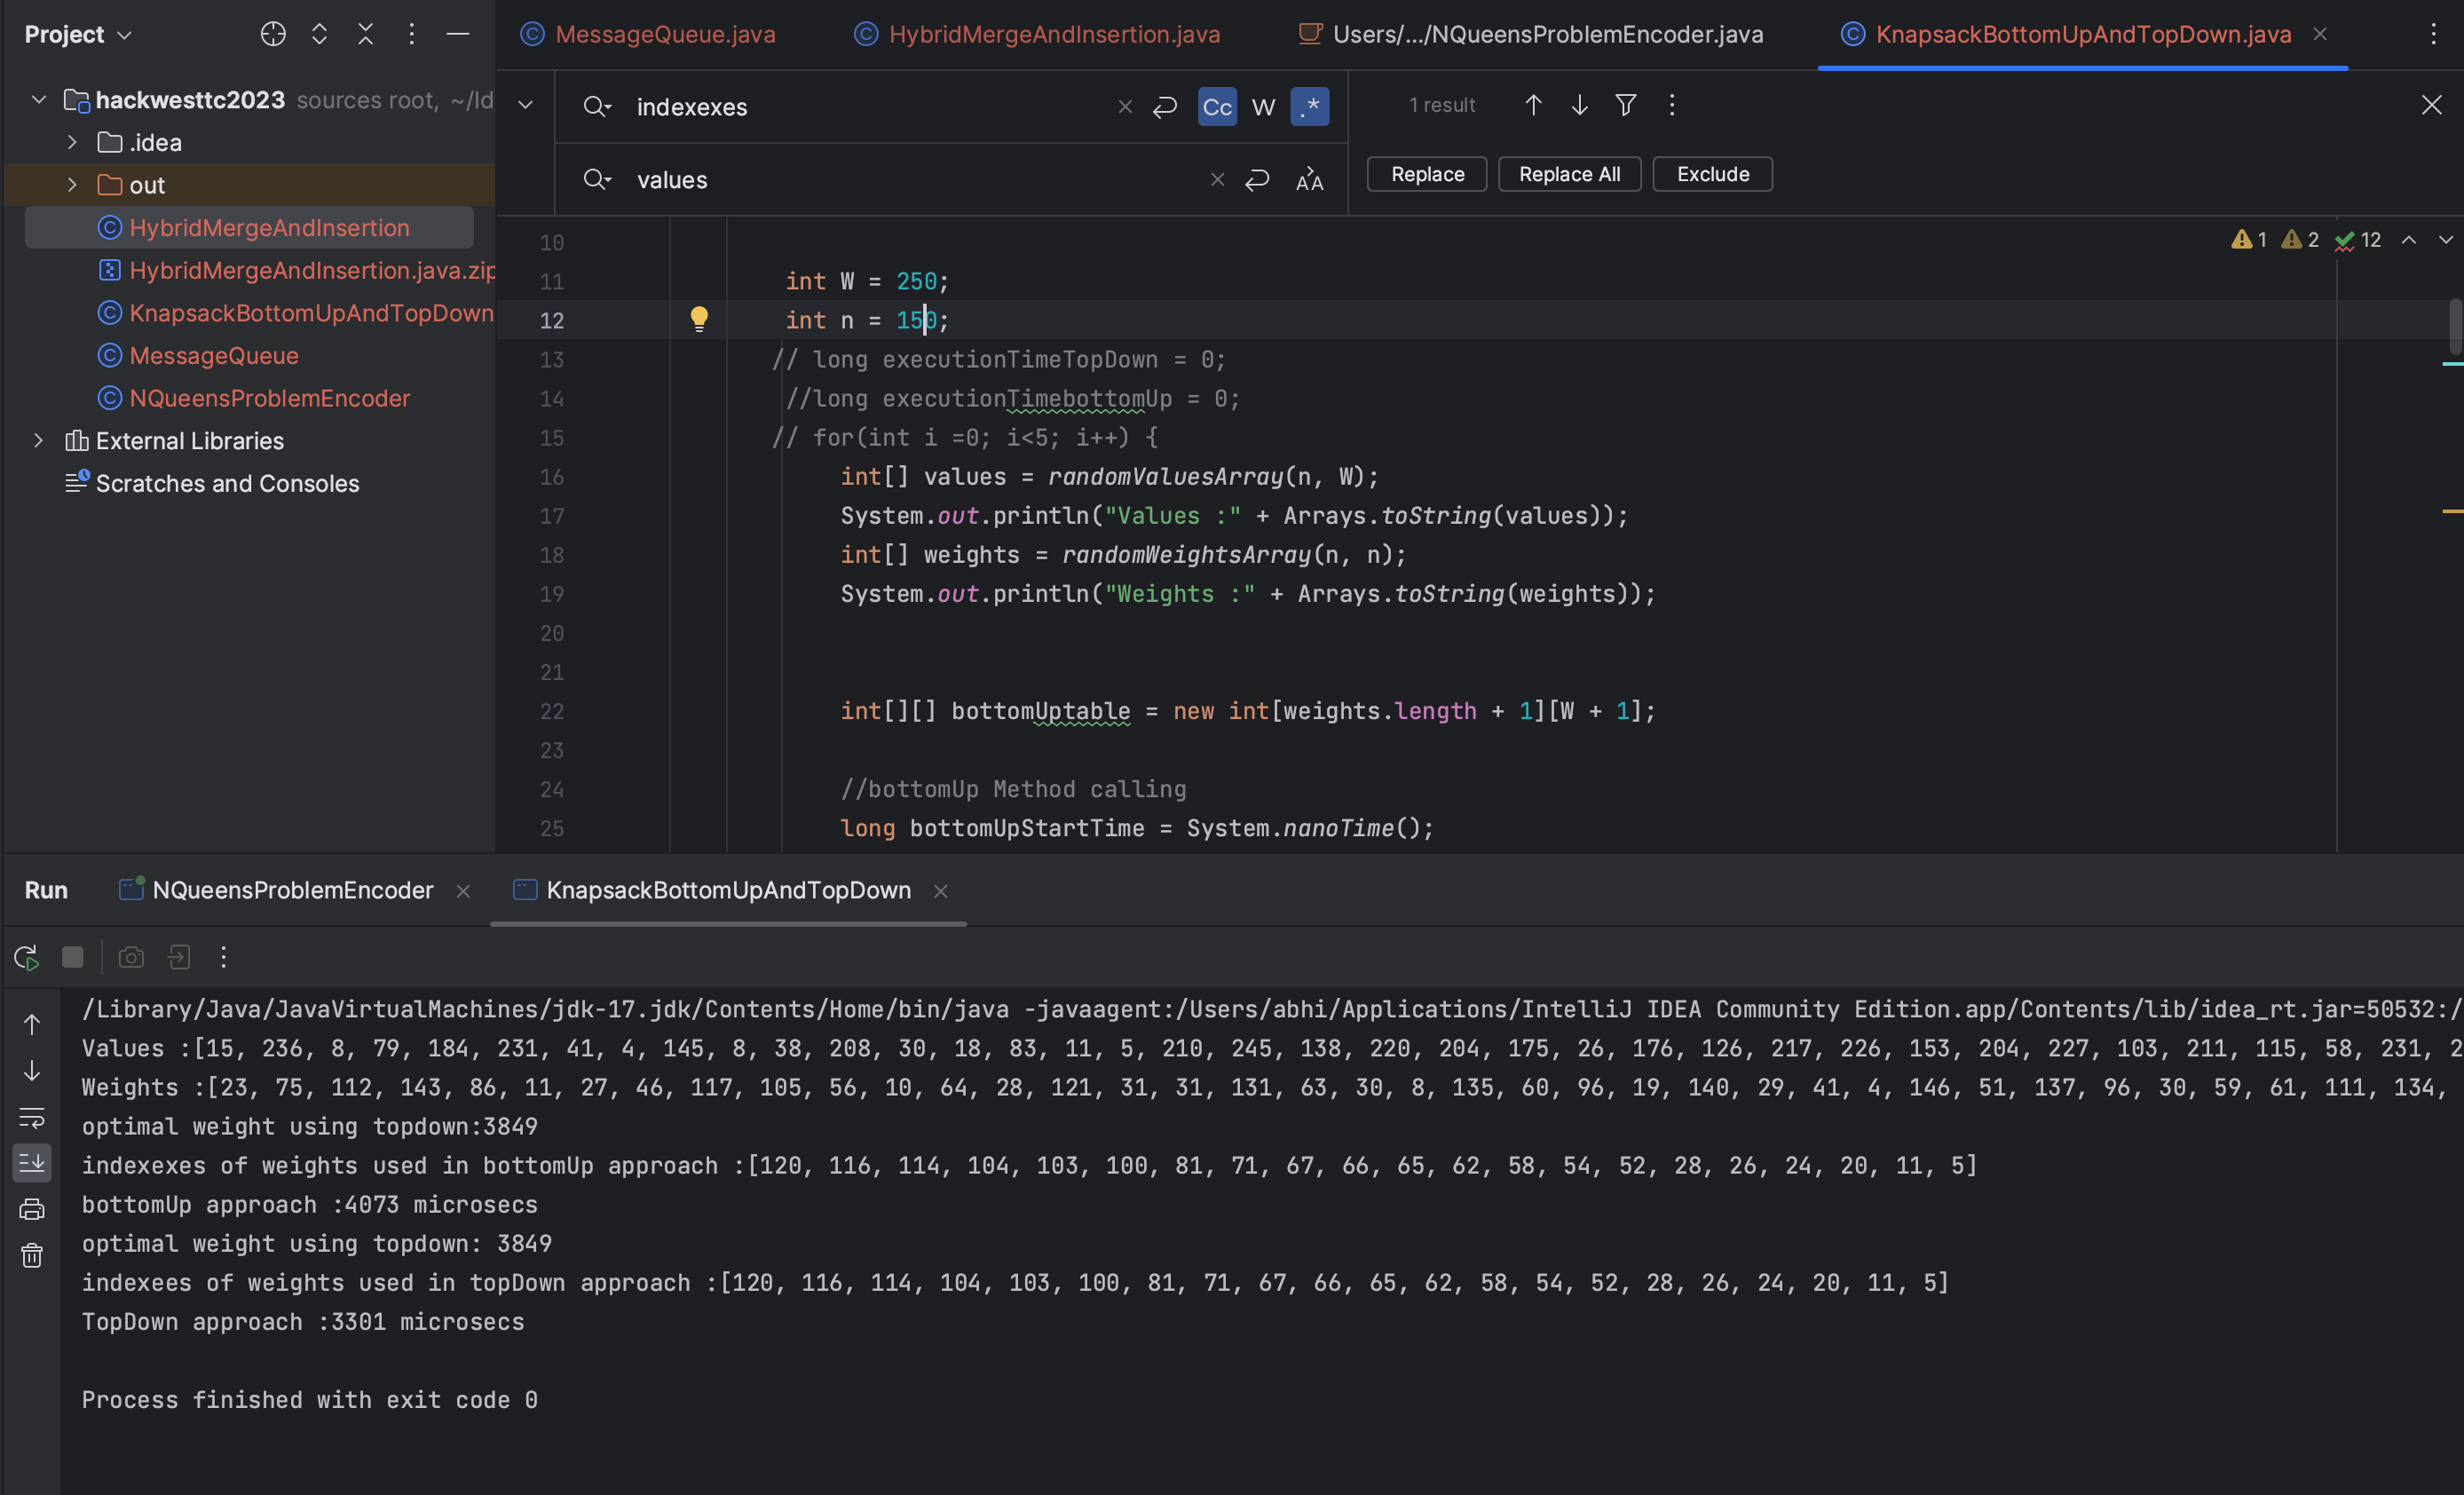

# **Deliverable 2 : Performance Comparison on Random Inputs with respect to n (for fixed W) &  with respect to W (for fixed n)**



# 1.    Plots which show run times with respect to W (for fixed n)





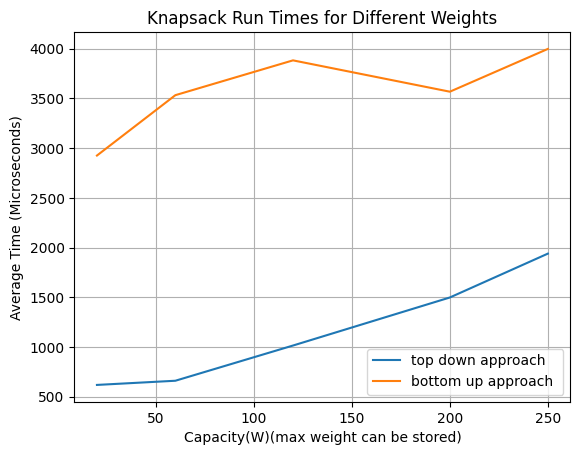

In [ ]:
import matplotlib.pyplot as plt

# Assume you have two lists of n values and corresponding average times for two different items
W_values = [20,60,120,200,250]
topDown = [619,661,1015,1498,1939]

bottomUp = [2925,3532,3882,3567,3997]

# Plotting for the first item
plt.plot(W_values, topDown, label='top down approach')

# Plotting for the second item
plt.plot(W_values, bottomUp, label='bottom up approach ')

# Set plot title and labels
plt.title('Knapsack Run Times for Different Weights')
plt.xlabel('Capacity(W)(max weight can be stored)')
plt.ylabel('Average Time (Microseconds)')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


**Observations:**

*   In the above plot idea is to show the runtime with respect to the max capacity of weight  a bag can hold when constant length i.e. 100 of weights and values considered.
*   so I can observe clearly that by icreasing the capacity of bag for constant length of values and weights run time is automatically increasint no matter what type of approach it is.
*   The main difference between the two approaches is that run time taking to solve the same problem is different though both the time complexities are same.
*   Reason behind this time difference is mainly because of using the mermorization in the top down approach.
*   bottom up approach follows the tabulation method where we try to calculate optmial value for each and every point
*   but in the topdown where we still calculate the optimal value at every point we try checking the in memorization whether same kind of subset problem is already solved or not.
*   by checking in the memorization it reduces some subset of problems resolving. that makes the topdown approach to run a bit faster comparing to the bottom up approach.
*   main point to be noted is we are taking average runtime. so some time system generated randmon input might be easy to find the solution or it can be system speed where there might be sudden downs in the graph even though capacity increased.












# 2.    Plots which show run times with respect to n (for fixed W)

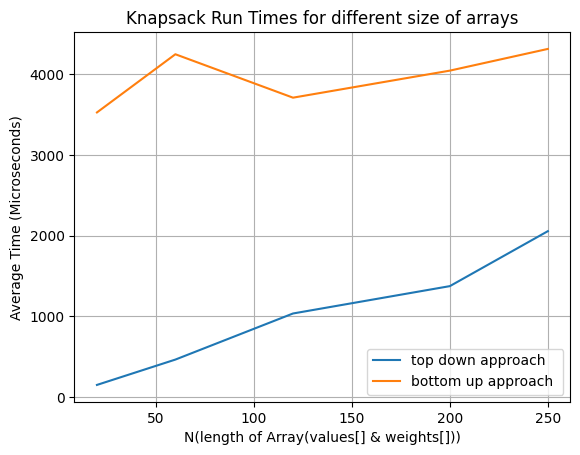

In [ ]:
import matplotlib.pyplot as plt

# Assume you have two lists of n values and corresponding average times for two different items
N_values = [20,60,120,200,250]
topDown = [152,466,1037,1376,2057]

bottomUp = [3528,4249,3711,4046,4315]

# Plotting for the first item
plt.plot(N_values, topDown, label='top down approach')

# Plotting for the second item
plt.plot(N_values, bottomUp, label='bottom up approach ')

# Set plot title and labels
plt.title('Knapsack Run Times for different size of arrays')
plt.xlabel('N(length of Array(values[] & weights[]))')
plt.ylabel('Average Time (Microseconds)')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

**Observations:**

*   In the current plot we have considered the capacity to be constant weight with 100 and tested for lengths [20,60,120,200,250] of weights and values.
*   When the bag capacity is constant and length changes it performs same like above plot but the time taking at each point is a bit when the weight is constant comapring to length constant.  
*   based on the both 1 & 2 graphs we can clearly conclude no matter what the W,n values is topdown approach is always bit quick to solve comparing to the bottomup approach. its specially beacuse of the memorization as discussed in earlier plot observations.
*   we can also observe that bottomup runtime is increasing a bit slow where as the topdown increasing a bit faster. specially because the top-down approach uses recursion, which can introduce additional overhead due to function calls. Recursive calls involve maintaining a call stack, which can impact performance, especially for large problem instances.
*  From my observation i see when we use the larger data sets like much higher data there can be chance of runtime difference between the topdown and bottomup will be less and at some point bottom up approach  will definetly be more efficient in both space and time complexity.because they avoid the overhead associated with recursive function calls







# **Deliverable 3 : Performance Comparison on Random Inputs with respect to n (for fixed W) &  with respect to W (for fixed n) where weights range are preferably 1 to 10**

# 1.    Plots which show run times with respect to W (for fixed n)

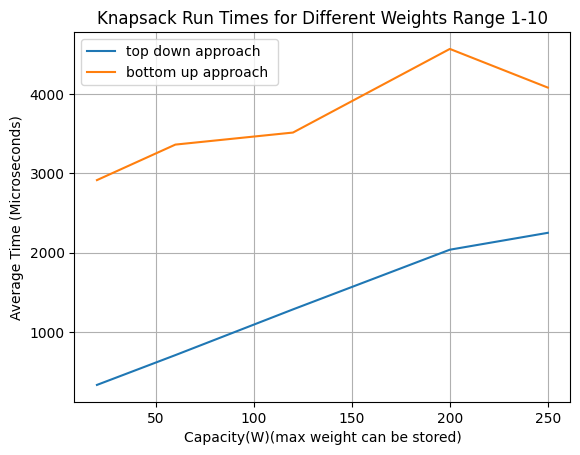

In [ ]:
import matplotlib.pyplot as plt

# Assume you have two lists of n values and corresponding average times for two different items
W_values = [20,60,120,200,250]
topDown = [332,708,1285,2038,2251]

bottomUp = [2916,3364,3516,4571,4083]

# Plotting for the first item
plt.plot(W_values, topDown, label='top down approach')

# Plotting for the second item
plt.plot(W_values, bottomUp, label='bottom up approach ')

# Set plot title and labels
plt.title('Knapsack Run Times for Different Weights Range 1-10')
plt.xlabel('Capacity(W)(max weight can be stored)')
plt.ylabel('Average Time (Microseconds)')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

2. Plots which show run times with respect to n (for fixed W)

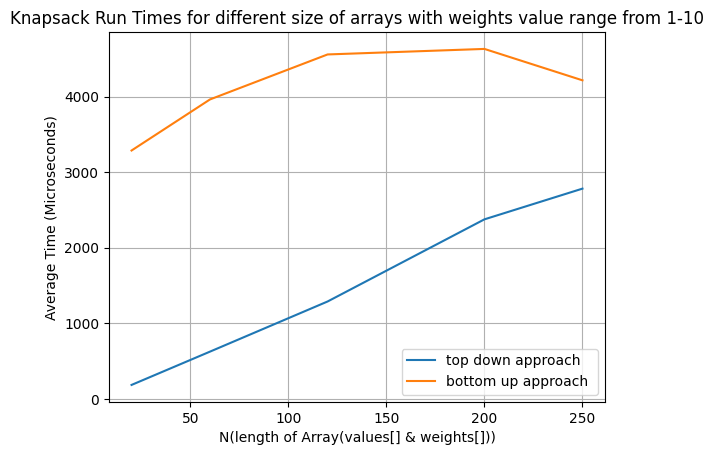

In [ ]:
import matplotlib.pyplot as plt

# Assume you have two lists of n values and corresponding average times for two different items
N_values = [20,60,120,200,250]
topDown = [187,627,1290,2376,2782]

bottomUp = [3286,3961,4556,4629,4214]

# Plotting for the first item
plt.plot(N_values, topDown, label='top down approach')

# Plotting for the second item
plt.plot(N_values, bottomUp, label='bottom up approach ')

# Set plot title and labels
plt.title('Knapsack Run Times for different size of arrays with weights value range from 1-10')
plt.xlabel('N(length of Array(values[] & weights[]))')
plt.ylabel('Average Time (Microseconds)')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

**Observations on 1 & 2 plots of deliverable 3:**

*  In both plots, the top-down approach consistently shows lower runtimes compared to the bottom-up approach.
*  The top-down approach tends to have a more gradual increase in runtime with increasing input size or capacity.
* As the size of the arrays (N) / capacity (W) increases, the runtime of both approaches tends to increase, but the top-down approach shows a more gradual increase.
* The performance characteristics observed in this plot suggest that, for the given problem instances and inputs, the top-down approach performs better in terms of runtime compared to the bottom-up approach.
* Though we took minimial weight values to fill the capacity there is not much difference in runtime comparing to the deliverable 2. we can say that range of weights doesnt matter much with respect to runtime. both are increasing the in same way.



# **Deliverable 4 : Pseudopolynomial-time Illustration**

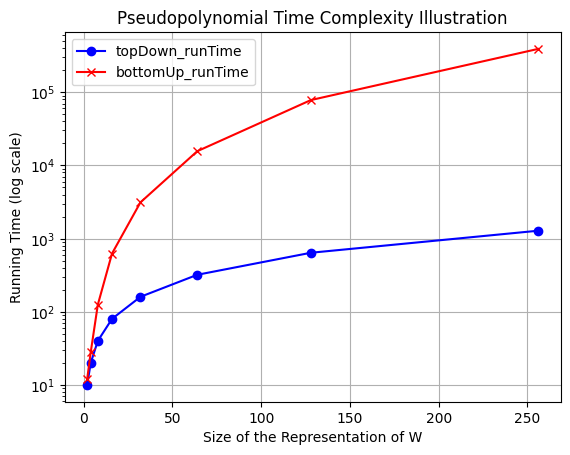

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual data
W_values = [2, 4, 8, 16, 32, 64, 128, 256]

# Two sets of runtime values for two different methods
topDown_runTime = [10, 20, 40, 80, 160, 320, 640, 1280]
bottomUp_runTime = [12, 28, 125, 625, 3125, 15625, 78125, 390625]

plt.plot(W_values, topDown_runTime, marker='o', linestyle='-', color='b', label='topDown_runTime')
plt.plot(W_values, bottomUp_runTime, marker='x', linestyle='-', color='r', label='bottomUp_runTime')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.title('Pseudopolynomial Time Complexity Illustration')
plt.xlabel('Size of the Representation of W')
plt.ylabel('Running Time (log scale)')
plt.legend()  # Display legend for different methods
plt.grid(True)
plt.show()



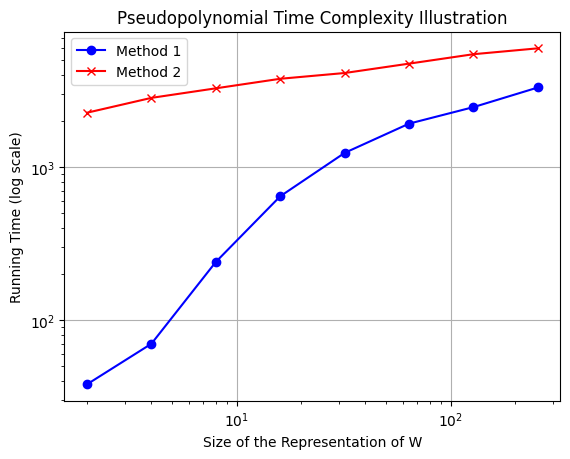

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual data
W_values = [2, 4, 8, 16, 32, 64, 128, 256]

# Two sets of runtime values for two different methods
topDown_runTime = [38, 70, 240, 645,1240, 1926, 2470, 3320]
bottomUp_runTime = [2270, 2839, 3278, 3785, 4128, 4754, 5480, 5987]

plt.plot(W_values, topDown_runTime, marker='o', linestyle='-', color='b', label='Method 1')
plt.plot(W_values, bottomUp_runTime, marker='x', linestyle='-', color='r', label='Method 2')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.title('Pseudopolynomial Time Complexity Illustration')
plt.xlabel('Size of the Representation of W')
plt.ylabel('Running Time (log scale)')
plt.legend()  # Display legend for different methods
plt.grid(True)
plt.show()

